# Covid-19 Trends Predictions

**As a Data owner you will prepare a dataset, convert the dataset into private tensors and create a login username/password for data scientist.**

## Import Libraries

In [1]:
import syft as sy
from syft.core.adp.entity import Entity

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Prepare Dataset

In this dataset, each column corresponds to a country, each row corresponds to a new month where data was collected, and each value in this DataFrame corresponds to the number of COVID19 cases in the country at the start of that month.

In [3]:
covid_data = pd.read_csv("L3_raw_data.csv")
covid_data.head()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,2280,2226,6198,184,1242,688,566,568,2190,88,...,1030,414,1444,802,468,1042,568,930,1044,2352
1,1140,1113,3099,92,621,344,283,284,1095,44,...,515,207,722,401,234,521,284,465,522,1176
2,1211,1378,2821,113,575,319,267,295,1167,52,...,577,231,655,449,224,600,224,577,492,1258
3,1238,1587,2356,107,520,265,296,316,1186,42,...,473,209,620,473,231,607,275,407,421,1109
4,1093,2075,2964,117,578,371,359,349,1151,48,...,550,227,648,447,232,563,188,338,432,1148


In [12]:
# Check if Nan values
covid_data.isna().values.any()

False

Now let's say, for instance, that when we were given the dataset, we were told that a lot of immigration and emmigration happened in the first month of this dataset, and as such a lot of double counting of COVID19 cases happened, and the global numbers of COVID19 were reported as twice of what they really were. 

Well that's odd — the data from the first month and second month appear to be exactly the same. If this happened to just one or two countries, that might be plausible, but for every country? That seems unlikely.

There likely was an error when transferring this data, and a duplication error occurred. We can fix this by simply removing the first month from our dataset, and starting our analysis from the second month (row 1 in the table above), and onwards.

In [13]:
# Remove duplicated row
covid_data.drop([0], inplace=True)

At this point, we might decide to visualize our dataset and see if there are any obvious outliers or anomalies. Let's look at the first country!

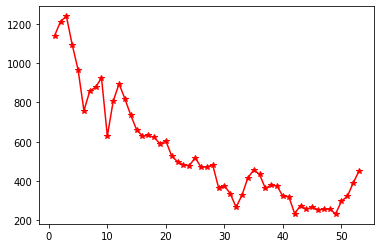

In [15]:
plt.plot(covid_data["0"], "r-*")

**Let's extrapolate the data using polynomial fit for 3 more months**

In [19]:
def plot_extrapolated_country(idx):
    x = list(range(53))
    y = covid_data[str(idx)]
    
    plt.plot(y)
    
    for x1, y1 in zip(x, y):
        plt.plot(x1, y1) #, 'ro')

    z = np.polyfit(x, y, 2)
    f = np.poly1d(z)

    new_points = range(12)
    for x2 in new_points:
        plt.plot(55 + x2, f(55 + x2), 'bo')

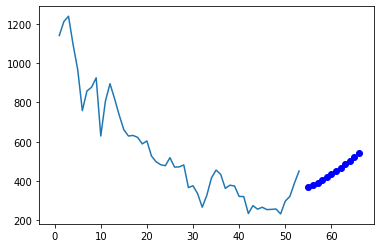

In [20]:
plot_extrapolated_country(0)

## Create data into private tensors

Convert the data into tensors using sy.Tensor and make the tensor private. (Such data is called metadata which is created using differential privacy which later can be accessed by the data scientist. Each data scientist is assigned with a differential privacy budget, which reduces as the number of times the meta data is accessed.)

Entities corresponds to the Data Subjects; i.e. the people whose data is in the dataset, whose privacy we're protecting using Differential Privacy.
Entities can be people (such as a medical patient), places (such as a family's address), or
even organizations (such as a business, state, or country). If you're not sure what kind of data subject
to include, just ask yourself the question, "who am I trying to protect the privacy of?". If it's
an organization, make one data subject per organization. If it's people, make one data subject per person.
If it's a group of people who are somehow similar/linked to each other (such as a family),
make each data subject a different group. 

In [30]:
dataset = dict()

for i in range(covid_data.shape[-1]):
    country_name = f"Country {i}"
    
    # Create a new Entity correspoinding to the country and add it to the list
    new_entity = Entity(name=country_name)
    
    # Add it to the Dataset Dictionary
    dataset[country_name] = sy.Tensor(covid_data.iloc[:, i].values.astype(np.int32)).private(min_val=0, max_val=150000, entities=new_entity)

In [35]:
dataset['Country 0']

Tensor(child=SingleEntityPhiTensor(entity=Country 0, child=[1140 1211 1238 1093  966  758  858  877  925  629  806  895  818  735
  661  629  632  622  589  604  527  498  483  478  519  471  472  482
  367  376  336  267  328  416  456  434  363  379  375  322  321  235
  275  257  267  255  256  258  233  298  322  390  451]))

## Log into Domain Node

**Local deployment of a domain for Linux, Windows, MacOS :**

- [Deploying domain on Linux](https://openmined.github.io/PySyft/install_tutorials/linux.html)
- [Deploying domain on Windows](https://openmined.github.io/PySyft/install_tutorials/windows.html)
- [Deploying domain on Mac](https://openmined.github.io/PySyft/install_tutorials/osx_11_5_1.html)

Create a domain name ‘domain_node’. Login to the domain on Hagrid using default ID & Password.

In [36]:
domain_node = sy.login(email="info@openmined.org", password="changethis", port=8081)


Anyone can login as an admin to your node right now because your password is still the default PySyft username and password!!!

Connecting to None... done! 	 Logging into local_node... done!


**Check if any previously uploaded dataset**

In [37]:
domain_node.datasets

## Upload the dataset to the domain created on HaGrid.

In [38]:
domain_node.load_dataset(
    assets=dataset, 
    name="COVID19 Cases in 175 countries", 
    description="Weekly data for an entire year", 
    metadata="Any metadata you'd like to include goes here"
)

Loading dataset... uploading... SUCCESS!                                                                                                                                      

Run <your client variable>.datasets to see your new dataset loaded into your machine!


**Check if the dataset has been created.**

In [39]:
domain_node.datasets

Idx,Name,Description,Assets,Id
[0],COVID19 Cases in 175 countries,Weekly data for an entire year,"[""Country 0""] -> Tensor[""Country 1""] -> Tensor[""Country 2""] -> Tensor...",51da7d0f-7e80-4b82-b5aa-9814a3ee9cef


## Create a new user as Data Scientist
Give access to perform Remote Data Science on our data.

In [40]:
domain_node.users.create(
    **{
        "name": "Zoheb A", 
        "email": "zoheb@amat.com", 
        "password": "bazinga", 
        "budget": 500}
                        )

In [41]:
domain_node.users

,id,email,name,budget,verify_key,role,added_by,website,institution,daa_pdf,created_at,budget_spent
0,5,info@openmined.org,Jane Doe,5.55,2058075227f28fc71106a138653e73e533e0323c08845d...,Owner,None,None,None,NaN,2022-08-04 12:33:20.055803,5.55
1,6,zoheb@amat.com,Zoheb A,500.00,4264dd06a9ff30e7afc002f43f2a0410eec1578816b46f...,Data Scientist,Jane Doe,,,3.0,2022-08-04 13:34:24.966974,500.00


**Congratulations! You've successfully deployed a Domain Node, loaded in data, and created a user account for a Data Scientist!**